In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
df = pd.read_csv('./Data/1970-2020_tracks')
df.head()

,acousticness,analysis_url,artist_name,danceability,duration_ms,energy,id,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence,year,0
0,0.6210,https://api.spotify.com/v1/audio-analysis/1wrF...,Bob Weir,0.569,221107.0,0.679,1wrFUny4CRCDV5wTMv7RYK,0.000125,6.0,0.1350,...,0.0297,149.346,4.0,https://api.spotify.com/v1/tracks/1wrFUny4CRCD...,Cassidy,audio_features,spotify:track:1wrFUny4CRCDV5wTMv7RYK,0.540,1970,NaN
1,0.6710,https://api.spotify.com/v1/audio-analysis/0dXa...,The Chakachas,0.757,167234.0,0.450,0dXapcDIbXkH91ObjpXQqh,0.000085,11.0,0.0802,...,0.4160,94.208,4.0,https://api.spotify.com/v1/tracks/0dXapcDIbXkH...,Stories??,audio_features,spotify:track:0dXapcDIbXkH91ObjpXQqh,0.962,1970,NaN
2,0.3030,https://api.spotify.com/v1/audio-analysis/12wB...,Tony Joe White,0.783,223533.0,0.543,12wB4syL3O9w54bpe1tmZX,0.015900,9.0,0.0892,...,0.0412,132.035,4.0,https://api.spotify.com/v1/tracks/12wB4syL3O9w...,Polk Salad Annie,audio_features,spotify:track:12wB4syL3O9w54bpe1tmZX,0.833,1970,NaN
3,0.0563,https://api.spotify.com/v1/audio-analysis/1K24...,Albert Hammond,0.584,229000.0,0.785,1K24PVzIzAKBzRhmVKRleL,0.000000,9.0,0.0853,...,0.0267,116.903,4.0,https://api.spotify.com/v1/tracks/1K24PVzIzAKB...,It Never Rains in Southern California,audio_features,spotify:track:1K24PVzIzAKBzRhmVKRleL,0.937,1970,NaN
4,0.2030,https://api.spotify.com/v1/audio-analysis/1NXy...,The J.B.'s,0.822,187560.0,0.426,1NXyoATCYylbjSDFe8FHbJ,0.000000,2.0,0.0715,...,0.0766,97.760,4.0,https://api.spotify.com/v1/tracks/1NXyoATCYylb...,Gimme Some More,audio_features,spotify:track:1NXyoATCYylbjSDFe8FHbJ,0.820,1970,NaN


# Data Cleaning

In [29]:
df.columns

Index(['acousticness', 'analysis_url', 'artist_name', 'danceability',
       'duration_ms', 'energy', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'track_name', 'type', 'uri', 'valence',
       'year', '0'],
      dtype='object')

**Dropping Columns irelevant to analysis**

In [30]:
df.drop(columns =['analysis_url', 'id', 'track_href', 'type', '0'], inplace = True)

In [31]:
df.columns

Index(['acousticness', 'artist_name', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'time_signature', 'track_name', 'uri',
       'valence', 'year'],
      dtype='object')

**Reordering Columns**

Putting important columns and common music metrics at the front, such as track name, artist name, key, tempo, time signature etc.

In [32]:
df= df[['track_name', 'artist_name', 'year', 'key', 'tempo','mode', 'time_signature', 'duration_ms',
        'popularity','loudness','acousticness', 'danceability', 'energy','instrumentalness',  'liveness',  
        'speechiness', 'valence', 'uri']]

df.head()

,track_name,artist_name,year,key,tempo,mode,time_signature,duration_ms,popularity,loudness,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,uri
0,Cassidy,Bob Weir,1970,6.0,149.346,1.0,4.0,221107.0,31,-7.784,0.6210,0.569,0.679,0.000125,0.1350,0.0297,0.540,spotify:track:1wrFUny4CRCDV5wTMv7RYK
1,Stories??,The Chakachas,1970,11.0,94.208,0.0,4.0,167234.0,35,-17.290,0.6710,0.757,0.450,0.000085,0.0802,0.4160,0.962,spotify:track:0dXapcDIbXkH91ObjpXQqh
2,Polk Salad Annie,Tony Joe White,1970,9.0,132.035,1.0,4.0,223533.0,38,-11.565,0.3030,0.783,0.543,0.015900,0.0892,0.0412,0.833,spotify:track:12wB4syL3O9w54bpe1tmZX
3,It Never Rains in Southern California,Albert Hammond,1970,9.0,116.903,1.0,4.0,229000.0,31,-6.134,0.0563,0.584,0.785,0.000000,0.0853,0.0267,0.937,spotify:track:1K24PVzIzAKBzRhmVKRleL
4,Gimme Some More,The J.B.'s,1970,2.0,97.760,1.0,4.0,187560.0,38,-9.968,0.2030,0.822,0.426,0.000000,0.0715,0.0766,0.820,spotify:track:1NXyoATCYylbjSDFe8FHbJ


**Deleting duplicate rows from our dataset**

In [33]:
df.shape

(104550, 18)

In [34]:
df.drop_duplicates(subset ="uri", keep = "first", inplace = True)

In [35]:
df.duplicated().sum()

0

In [36]:
df.shape

(99449, 18)

**Looking at Null values**

In [37]:
df.isnull().sum()

track_name          0
artist_name         0
year                0
key                 1
tempo               1
mode                1
time_signature      1
duration_ms         1
popularity          0
loudness            1
acousticness        1
danceability        1
energy              1
instrumentalness    1
liveness            1
speechiness         1
valence             1
uri                 1
dtype: int64

Since only 1 row is showing NaNs, I will just drop it because it is a very small percentage of all my data.

In [38]:
df.dropna(inplace=True)
df.shape

(99448, 18)

**Checking Data types of the data**  
All the columns look like they are in the intended data types for analysis.

In [39]:
df.dtypes

track_name           object
artist_name          object
year                  int64
key                 float64
tempo               float64
mode                float64
time_signature      float64
duration_ms         float64
popularity            int64
loudness            float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
valence             float64
uri                  object
dtype: object

In [40]:
df.to_csv('./Data/1970-2020_tracks_cleaned', index = False)

# EDA

**Taking a quick look at summary statistics**

In [41]:
df.describe()

,year,key,tempo,mode,time_signature,duration_ms,popularity,loudness,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
count,99448.000000,99448.000000,99448.000000,99448.000000,99448.000000,9.944800e+04,99448.000000,99448.000000,99448.000000,99448.000000,99448.000000,99448.000000,99448.000000,99448.000000,99448.000000
mean,1994.998532,5.241312,120.423056,0.700587,3.906675,2.441456e+05,42.530016,-9.619928,0.307432,0.558698,0.598367,0.107613,0.201783,0.080896,0.529677
std,14.721099,3.548813,30.055845,0.458003,0.398531,1.052575e+05,13.455991,5.161933,0.314836,0.176208,0.247367,0.256044,0.181345,0.099527,0.259641
min,1970.000000,0.000000,0.000000,0.000000,0.000000,1.256400e+04,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,2.000000,96.910000,0.000000,4.000000,1.908000e+05,32.000000,-12.102000,0.028900,0.440000,0.427000,0.000000,0.092900,0.033900,0.322000
50%,1995.000000,5.000000,118.617500,1.000000,4.000000,2.292270e+05,42.000000,-8.535000,0.185000,0.568000,0.624000,0.000063,0.128000,0.044500,0.535500
75%,2008.000000,8.000000,139.899250,1.000000,4.000000,2.765070e+05,52.000000,-5.949000,0.544000,0.688000,0.802000,0.013700,0.254000,0.076800,0.745000
max,2020.000000,11.000000,243.507000,1.000000,5.000000,5.403500e+06,93.000000,3.744000,0.996000,0.988000,1.000000,1.000000,1.000000,0.965000,1.000000


Looking at the relationship between all our features.

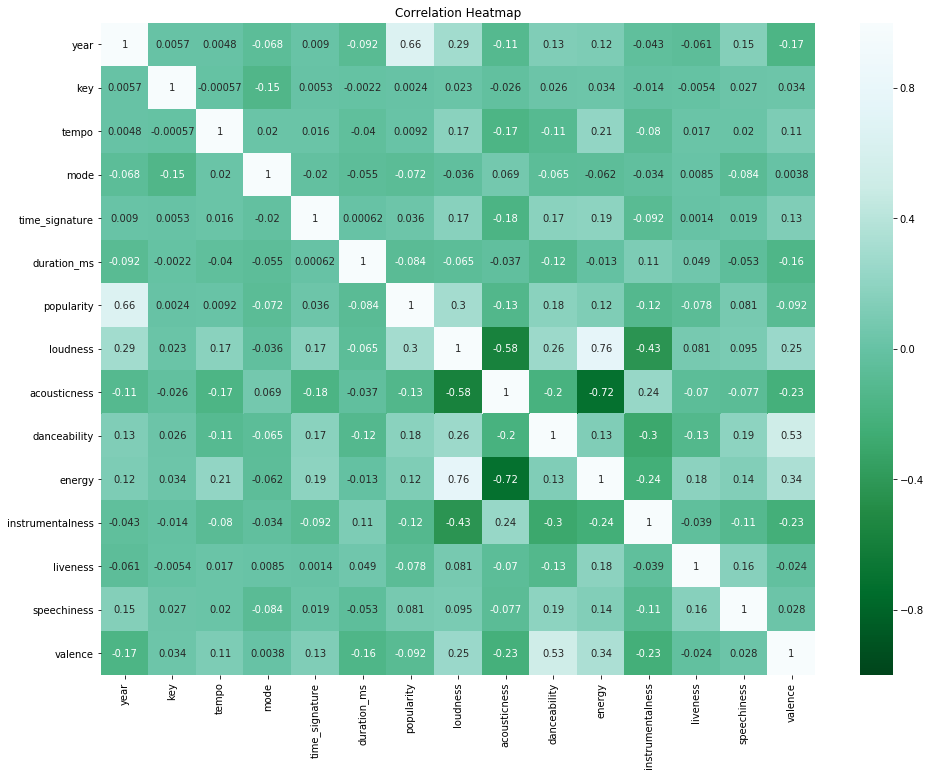

In [79]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),  cmap = "BuGn_r", vmin=-1, vmax=1,  annot=True);
plt.title("Correlation Heatmap")
plt.savefig("./Assets/heatmap.png")

In [67]:
sns.set_palette('Greens')

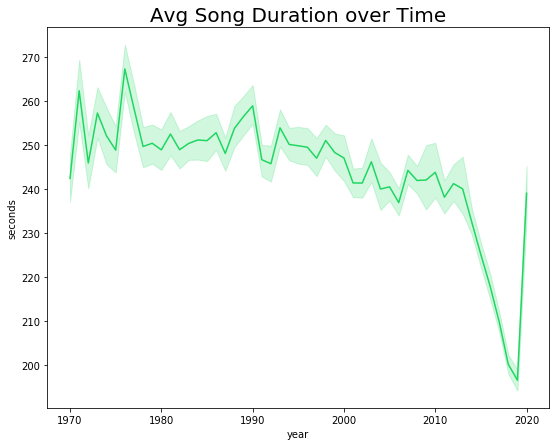

In [80]:
plt.figure(figsize=(9,7))
sns.lineplot(x = df['year'], y = df['duration_ms']/1000, color ='#1ed760').set_title("Avg Song Duration over Time", fontsize = 20);

plt.ylabel("seconds")
plt.savefig("./Assets/duration.png")

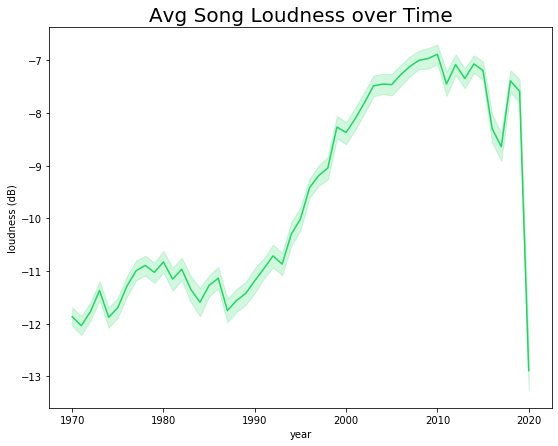

In [81]:
plt.figure(figsize=(9,7))
sns.lineplot(x = df['year'], y = df['loudness'], color ='#1ed760').set_title("Avg Song Loudness over Time", fontsize = 20);

plt.ylabel("loudness (dB)")
plt.savefig("./Assets/loudness.png")

In [69]:
['C','C#', 'D', 'D#', 'E', 'F','F#','G', 'G#', 'A', 'A#','B']

['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

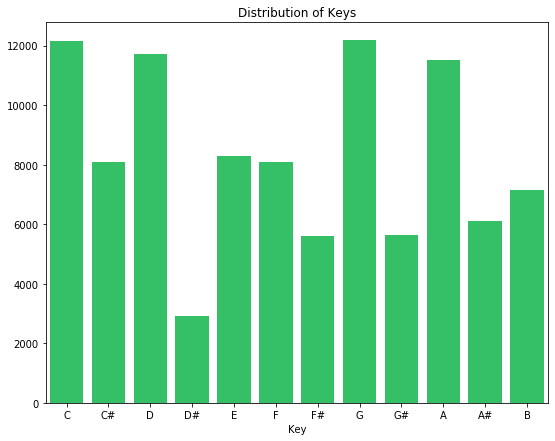

In [77]:
plt.figure(figsize=(9,7))
sns.barplot(['C','C#', 'D', 'D#', 'E', 'F','F#','G', 'G#', 'A', 'A#','B'], df['key'].value_counts().sort_index(), color = '#1ed760');
#plt.xticks(['C','C#', 'D', 'D#', 'E', 'F','F#','G', 'G#', 'A', 'A#','B']);

plt.title("Distribution of Keys")
plt.xlabel("Key");
plt.ylabel('');
plt.savefig("./Assets/key.png")

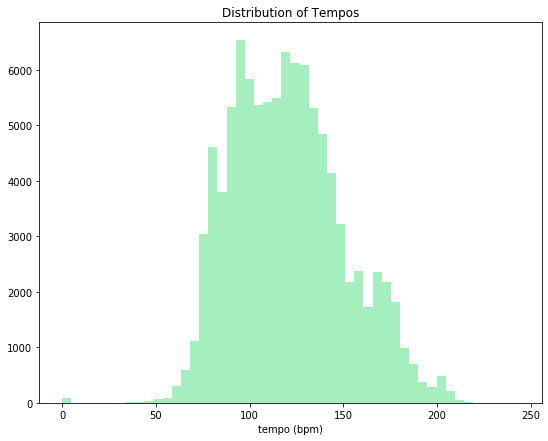

In [72]:
plt.figure(figsize=(9,7))
sns.distplot(df['tempo'], kde = False, color = '#1ed760');

plt.title("Distribution of Tempos")
plt.xlabel("tempo (bpm)");
plt.savefig("./Assets/tempo.png")

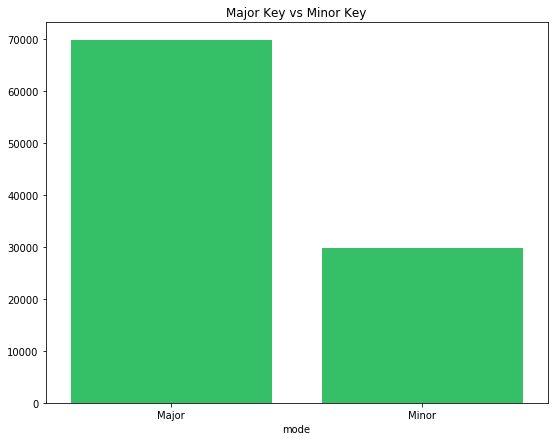

In [76]:
plt.figure(figsize=(9,7))
sns.barplot(['Major', 'Minor'], df['mode'].value_counts(), color = '#1ed760');
plt.xticks([0,1]);

plt.title("Major Key vs Minor Key")
plt.xlabel("mode");
plt.ylabel('');
plt.savefig("./Assets/mode.png")